<a href="https://colab.research.google.com/github/DEB-PROSAD-SEN/Kaggle_competition/blob/main/Titanic_survived_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
train=pd.read_csv(r"/content/sample_data/train.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.shape

(891, 12)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age'>

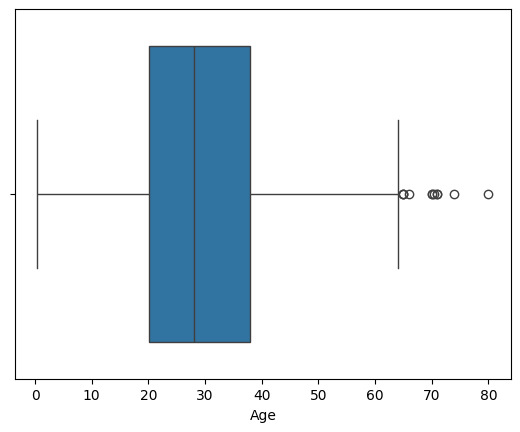

In [ ]:
sns.boxplot(x="Age",data=train)

In [ ]:
train["Age"]=train["Age"].fillna(train["Age"].median())

In [ ]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode())

In [ ]:
train["Family_size"]=train["SibSp"]+train["Parch"]+1

In [ ]:
train["is_Alone"]=(train["Family_size"]==1).astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [ ]:
train["Title"]=train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2517442485.py:1: SyntaxWarning: invalid escape sequence '\.'
  train["Title"]=train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [ ]:
train["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
train["Title"]=train["Title"].replace(["Mlle","Ms"],"Miss")

In [ ]:
train["Title"]=train["Title"].replace("Mme","Mrs")

In [ ]:
train['Title'] = train['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

In [ ]:
train["Title"].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [ ]:
counts = train["Ticket"].value_counts()
train["Ticket_Frequency"] = train["Ticket"].map(counts)
train["Ticket_Prefix"] = train["Ticket"].str.replace(r"[^A-Za-z]", "", regex=True)
train.loc[train["Ticket_Prefix"] == "", "Ticket_Prefix"] = "None"

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr,1,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs,1,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,1,STONO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs,2,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,1,None


In [ ]:
train["Ticket_Prefix"].value_counts()

,count
Ticket_Prefix,
None,661
PC,60
CA,41
A,28
STONO,18
SOTONOQ,15
WC,10
SCPARIS,7
SOC,6


In [ ]:
prefix_counts = train["Ticket_Prefix"].value_counts()
rare_prefixes = prefix_counts[prefix_counts < 10].index  # threshold=10

train["Ticket_Prefix"] = train["Ticket_Prefix"].replace(rare_prefixes, "Rare")



In [ ]:
train["Ticket_Prefix"].value_counts()

,count
Ticket_Prefix,
None,661
PC,60
Rare,58
CA,41
A,28
STONO,18
SOTONOQ,15
WC,10


In [ ]:
train["HasCabin"] = (~train["Cabin"].isna()).astype(int)

# Feature 2: Cabin_Letter (first character of cabin, or "None")
train["Cabin_Letter"] = train["Cabin"].astype(str).str[0]
train.loc[train["Cabin"].isna(), "Cabin_Letter"] = "None"


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix,HasCabin,Cabin_Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr,1,A,0,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs,1,PC,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,1,STONO,0,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs,2,None,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,1,None,0,None


In [ ]:
cols=["Sex","Embarked","Title","Ticket_Prefix","Cabin_Letter"]

In [ ]:
for col in cols:
    le=LabelEncoder()
    train[col]=le.fit_transform(train[col].astype(str))

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix,HasCabin,Cabin_Letter
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,0,2,1,0,0,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,0,3,1,3,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,1,1,6,0,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,0,3,2,2,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,1,2,1,2,0,7


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_train=train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Family_size","is_Alone","Title","Ticket_Frequency","Ticket_Prefix","HasCabin"]]

In [ ]:
y_train=train["Survived"]

In [ ]:
test=pd.read_csv(r"/content/sample_data/test.csv")

In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
test["Age"]=test["Age"].fillna(test["Age"].median())

In [ ]:
test["Fare"]=test["Fare"].fillna(test["Fare"].median())

In [ ]:
test["Family_size"]=test["SibSp"]+test["Parch"]+1

In [ ]:
test["is_Alone"]=(test["Family_size"]==1).astype(int)

In [ ]:
test["Title"]=test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-374381453.py:1: SyntaxWarning: invalid escape sequence '\.'
  test["Title"]=test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
test["Title"].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [ ]:
test["Title"]=test["Title"].replace("Ms","Miss")

In [ ]:
test["Title"]=test["Title"].replace(["Col","Rev","Dr","Dona"],"Rare")

In [ ]:
test["Title"].value_counts()

,count
Title,
Mr,240
Miss,79
Mrs,72
Master,21
Rare,6


In [ ]:
counts2 = test["Ticket"].value_counts()
test["Ticket_Frequency"] = test["Ticket"].map(counts2)
test["Ticket_Prefix"] = test["Ticket"].str.replace(r"[^A-Za-z]", "", regex=True)
test.loc[test["Ticket_Prefix"] == "", "Ticket_Prefix"] = "None"

In [ ]:
prefix_counts2 = test["Ticket_Prefix"].value_counts()
rare_prefixes1 = prefix_counts2[prefix_counts2 < 10].index  # threshold=10

test["Ticket_Prefix"] = test["Ticket_Prefix"].replace(rare_prefixes1, "Rare")



In [ ]:
test["Ticket_Prefix"].value_counts()

,count
Ticket_Prefix,
None,296
Rare,52
PC,32
CA,27
A,11


In [ ]:
test["HasCabin"] = (~test["Cabin"].isna()).astype(int)

# Feature 2: Cabin_Letter (first character of cabin, or "None")
test["Cabin_Letter"] = test["Cabin"].astype(str).str[0]
test.loc[test["Cabin"].isna(), "Cabin_Letter"] = "None"


In [ ]:
test["HasCabin"].value_counts()

,count
HasCabin,
0,327
1,91


In [ ]:
test["Cabin_Letter"].value_counts()

,count
Cabin_Letter,
None,327
C,35
B,18
D,13
E,9
F,8
A,7
G,1


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix,HasCabin,Cabin_Letter
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr,1,None,0,None
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs,1,None,0,None
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr,1,None,0,None
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr,1,None,0,None
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs,1,None,0,None


In [ ]:
for col in cols:
    le=LabelEncoder()
    test[col]=le.fit_transform(test[col].astype(str))

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix,HasCabin,Cabin_Letter
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,1,1,2,1,2,0,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,2,0,3,1,2,0,7
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,1,1,2,1,2,0,7
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,1,1,2,1,2,0,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,3,0,3,1,2,0,7


In [ ]:
X_test=test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Family_size","is_Alone","Title","Ticket_Frequency","Ticket_Prefix","HasCabin"]]

In [ ]:
df3=pd.read_csv(r"/content/sample_data/gender_submission.csv")

In [ ]:
y_test=df3["Survived"]

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix,HasCabin
0,3,1,22.0,1,0,7.2500,2,2,0,2,1,0,0
1,1,0,38.0,1,0,71.2833,0,2,0,3,1,3,1
2,3,0,26.0,0,0,7.9250,2,1,1,1,1,6,0
3,1,0,35.0,1,0,53.1000,2,2,0,3,2,2,1
4,3,1,35.0,0,0,8.0500,2,1,1,2,1,2,0


In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,is_Alone,Title,Ticket_Frequency,Ticket_Prefix,HasCabin
0,3,1,34.5,0,0,7.8292,1,1,1,2,1,2,0
1,3,0,47.0,1,0,7.0000,2,2,0,3,1,2,0
2,2,1,62.0,0,0,9.6875,1,1,1,2,1,2,0
3,3,1,27.0,0,0,8.6625,2,1,1,2,1,2,0
4,3,0,22.0,1,1,12.2875,2,3,0,3,1,2,0


In [ ]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [ ]:
from feature_engine.selection import DropConstantFeatures

In [ ]:
constant_features = DropConstantFeatures(tol=0.998)
X_train = constant_features.fit_transform(X_train)
X_test = constant_features.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
param_dist = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7, 10],
    'gamma': [0, 0.1, 0.3, 0.5, 1, 2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1, 5, 10],
    'reg_lambda': [0.1, 1, 5, 10, 20]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # try 50 random combos
    scoring='accuracy',  # Titanic is classification
    cv=5,  # 5-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:29:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5, 1, 2],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000],
                                        'reg_alpha': [0, 0.01, 0.1, 1, 5, 10],
                                        'reg_lambda': [0.1, 1, 5, 10, 20],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
pred=random_search.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,pred)

In [ ]:
print(acc)

0.8875598086124402


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(
    iterations=1500,          # number of boosting rounds
    depth=7,                  # depth of trees (try 6–10)
    learning_rate=0.05,       # smaller = slower but better generalization
    l2_leaf_reg=3,            # L2 regularization (try 1–10)
    bagging_temperature=1,    # randomness in sampling (0=none, >1=more)
    random_strength=5,        # random score added at leaves
    border_count=128,         # number of splits for numerical features
    task_type="GPU",          # 🚀 use GPU
    loss_function="Logloss",  # binary classification
    eval_metric="Accuracy",   # metric to track
    random_seed=42,
    verbose=200               # print progress every 200 iters
)

In [ ]:
model.fit(X_resampled, y_resampled)

0:	learn: 0.8242259	total: 74.2ms	remaining: 1m 51s
200:	learn: 0.8907104	total: 5.39s	remaining: 34.8s
400:	learn: 0.9125683	total: 13.1s	remaining: 35.8s
600:	learn: 0.9280510	total: 19.3s	remaining: 28.9s
800:	learn: 0.9398907	total: 28.2s	remaining: 24.6s
1000:	learn: 0.9444444	total: 34.9s	remaining: 17.4s
1200:	learn: 0.9489982	total: 43.2s	remaining: 10.7s
1400:	learn: 0.9508197	total: 49.9s	remaining: 3.53s
1499:	learn: 0.9508197	total: 55.1s	remaining: 0us


In [ ]:
pred=model.predict(X_test)

In [ ]:
accuracy_score(pred,y_test)

0.8708133971291866

In [ ]:
import lightgbm as lgb

In [ ]:
params2 = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "device": "gpu",          # 🚀 Use GPU
    "learning_rate": 0.03,
    "num_leaves": 31,         # controls complexity
    "max_depth": -1,          # -1 means no limit
    "min_child_samples": 20,  # min data per leaf
    "subsample": 0.8,         # bagging
    "colsample_bytree": 0.8,  # feature sampling
    "reg_alpha": 0.1,         # L1 regularization
    "reg_lambda": 0.1,        # L2 regularization
    "n_estimators": 1500,
    "verbose": -1,
    "random_state": 42
}


In [ ]:
model2 = lgb.LGBMClassifier(**params2)

In [ ]:
model2.fit(X_resampled, y_resampled,)

LGBMClassifier(colsample_bytree=0.8, device='gpu', learning_rate=0.03,
               metric='binary_logloss', n_estimators=1500, objective='binary',
               random_state=42, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8,
               verbose=-1)

In [ ]:
pred2=model.predict(X_test)

In [ ]:
accuracy_score(pred2,y_test)

0.8708133971291866

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
final_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    random_state=42
)


In [ ]:
final_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
pred3=final_model.predict(X_test)

In [ ]:
accuracy_score(pred3,y_test)

0.8492822966507177

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(
    n_estimators=300,       # number of trees
    criterion="gini",       # or "entropy"
    max_depth=8,            # controls overfitting
    min_samples_split=10,   # minimum samples to split
    min_samples_leaf=4,     # minimum samples per leaf
    max_features="sqrt",    # random subset of features at each split
    bootstrap=True,         # bagging enabled
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

In [ ]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_val_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.8708


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ("decision_tree", final_model),
        ("random_forest", rf),
        ("lightgbm", model2),
        ("catboost", model),
    ],
    voting="soft"  # "soft" = average predicted probabilities, better than hard majority vote
)

In [ ]:
ensemble.fit(X_resampled, y_resampled)

0:	learn: 0.8242259	total: 18.4ms	remaining: 27.6s
200:	learn: 0.8907104	total: 5.18s	remaining: 33.5s
400:	learn: 0.9125683	total: 12.9s	remaining: 35.4s
600:	learn: 0.9280510	total: 19s	remaining: 28.4s
800:	learn: 0.9398907	total: 27.8s	remaining: 24.2s
1000:	learn: 0.9444444	total: 36s	remaining: 17.9s
1200:	learn: 0.9489982	total: 42.3s	remaining: 10.5s
1400:	learn: 0.9508197	total: 50.9s	remaining: 3.6s
1499:	learn: 0.9508197	total: 54.2s	remaining: 0us


VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('lightgbm',
                              LGBMClassifier(colsample_bytree=0.8, device='gpu',
                                             learning_rate=0.03,
                                             metric='binary_logloss',
                                             n_estimators=1500,
                                             objective='binary',
                                             random_state=42, reg_alpha=0.1,
                                             reg_lambda=0.1, subsample=0.8,
                                             verbose=-1)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7e27bbf305f0>)],
                 voting='soft')

In [ ]:
y_val_pred = ensemble.predict(X_test)
val_acc = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy (Ensemble): {val_acc:.4f}")

Validation Accuracy (Ensemble): 0.8756


In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 7.4 MB/s eta 0:00:00
